In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# REGRESIÓN LOGISTICA

## QUEREMOS CREAR UN MODELO QUE PERMITA DETERMINAR EL SEXO DEL UN PINGUINO

In [3]:
penguins_df = sns.load_dataset('penguins')
penguins_df.dropna(inplace=True)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# AGREGAMOS VARIABLE NÚMERICA DEPENDIENTE EN BASE AL SEXO

In [5]:
penguins_df = (
    penguins_df.assign(numeric_sex=lambda df: df.sex.replace(['Female','Male'],[0,1]))
)
penguins_df

<ipython-input-5-2c2cad102706>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  penguins_df.assign(numeric_sex=lambda df: df.sex.replace(['Female','Male'],[0,1]))


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0


# APLICAMOS EL MODELO REGRESIÓN LOGISTICA

In [7]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island) + C(species)',
    data=penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.264693
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      325
Method:                           MLE   Df Model:                            7
Date:                Thu, 06 Feb 2025   Pseudo R-squ.:                  0.6181
Time:                        02:46:51   Log-Likelihood:                -88.143
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.214e-58
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -82.3445     10.076     -8.172      0.000    -102.094     -62.595
C(island)[T.Dream]          0.3934      0.667      0.590      0.555      -0.913       1.700
C(island)[T.Torgersen]     -0.6598      0.739     -0.893      0.372      -2.108       0.789
C(species)[T.Chinstrap]    -8.2479      1.371     -6.014      0.000     -10.936      -5.560
C(species)[T.Gentoo]       -1.2822      1.746     -0.734      0.463      -4.705       2.141
flipper_length_mm           0.0995      0.038      2.602      0.009       0.025       0.174
bill_length_mm              0.6619      0.107      6.193      0.000       0.452       0.871
bill_depth_mm               2.0641      0.306      6.750      0.000       1.465       2.664
===========================================================================================
"""

In [8]:
model_sex = smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island) + C(species)',
    data=penguins_df
).fit()

model_sex.params

Optimization terminated successfully.
         Current function value: 0.264693
         Iterations 8


,0
Intercept,-82.344464
C(island)[T.Dream],0.393351
C(island)[T.Torgersen],-0.659830
C(species)[T.Chinstrap],-8.247883
C(species)[T.Gentoo],-1.282189
flipper_length_mm,0.099514
bill_length_mm,0.661924
bill_depth_mm,2.064121


In [9]:
model_sex = smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm',
    data=penguins_df
).fit()

model_sex.params

Optimization terminated successfully.
         Current function value: 0.376835
         Iterations 7


,0
Intercept,-61.685986
flipper_length_mm,0.162241
bill_length_mm,0.098284
bill_depth_mm,1.453927


# HACEMOS UN PREDICCIÓN CON NUESTRO MODELO

In [12]:
is_male_predictions = pd.DataFrame(
    dict(
        actual_value = penguins_df.numeric_sex,
        predicted_value = model_sex.predict().round()
    )
)
is_male_predictions

,actual_value,predicted_value
0,1,0.0
1,0,0.0
2,0,1.0
4,0,1.0
5,1,1.0
...,...,...
338,0,0.0
340,0,0.0
341,1,1.0
342,0,0.0


# MATRIZ DE CONFUSIÓN

In [13]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(is_male_predictions.actual_value,is_male_predictions.predicted_value)
conf_matrix

array([[134,  31],
       [ 32, 136]])

<ipython-input-14-3bd0813523c1>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


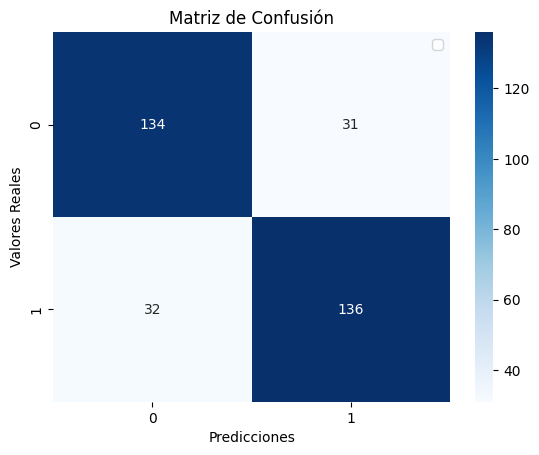

In [14]:
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.legend()
plt.show()

In [16]:
print(f'Pseudo R2 : {model_sex.prsquared:.4f}')
model_sex.summary()

Pseudo R2 : 0.4563


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      329
Method:                           MLE   Df Model:                            3
Date:                Thu, 06 Feb 2025   Pseudo R-squ.:                  0.4563
Time:                        03:29:36   Log-Likelihood:                -125.49
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 2.121e-45
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -61.6860      6.780     -9.098      0.000     -74.974     -48.398
flipper_length_mm     0.1622      0.023      7.097      0.000       0.117       0.207
bill_length_mm        0.0983      0.041      2.417      0.016       0.019       0.178
bill_depth_mm         1.4539      0.163      8.912      0.000       1.134       1.774
=====================================================================================
"""

# ACCURACY

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(is_male_predictions['actual_value'],is_male_predictions['predicted_value'])
print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.8108
